In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")



In [2]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.describe()  #in this df there is outliers ...  

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
df.isna().sum()  # in this df there's no nan value 

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
linhas_duplicadas = df.duplicated()
print(linhas_duplicadas.sum())  #  there's  no  duplicate value present

0


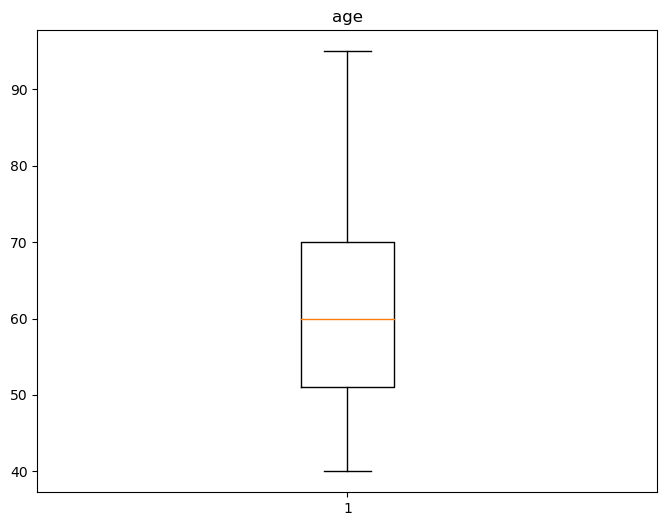

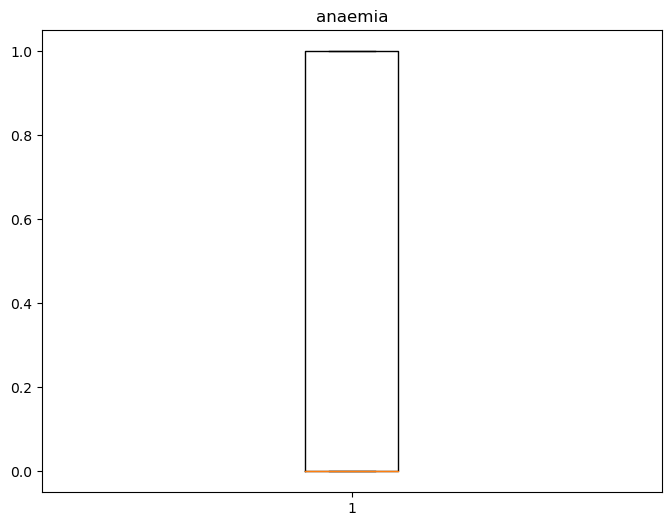

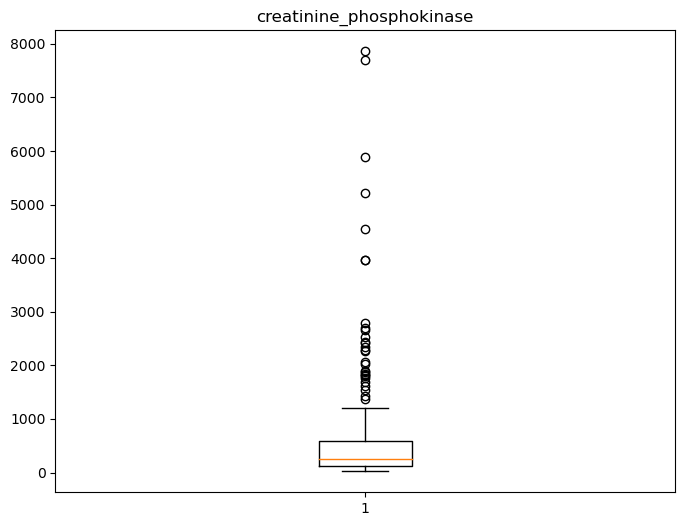

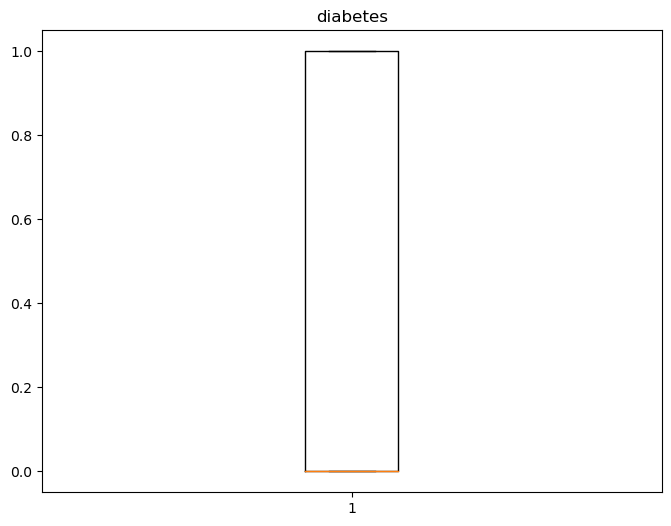

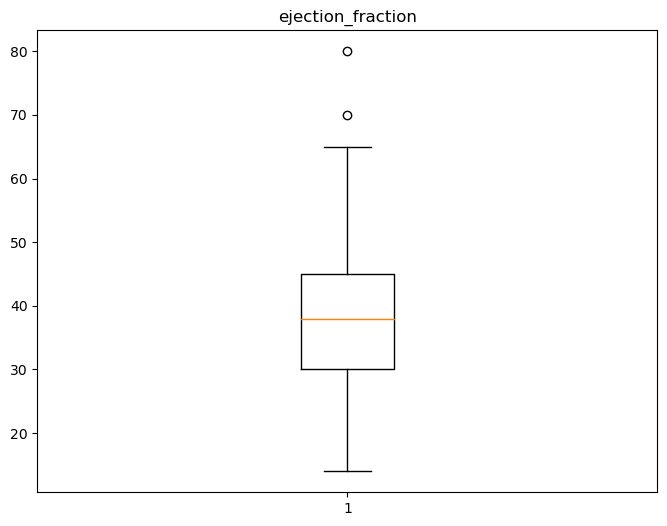

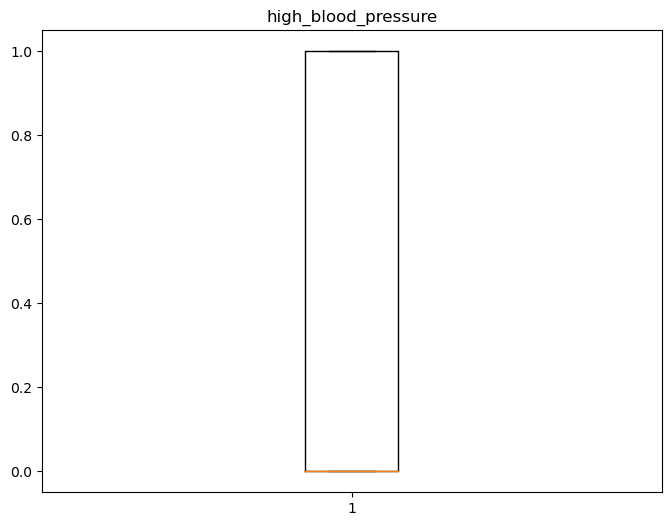

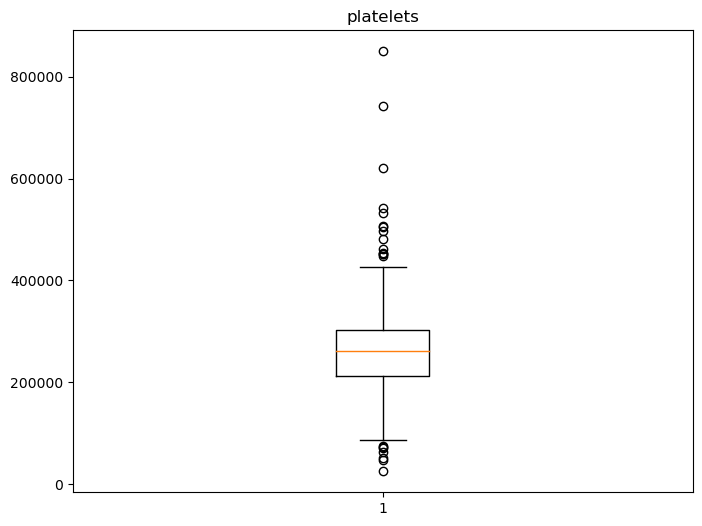

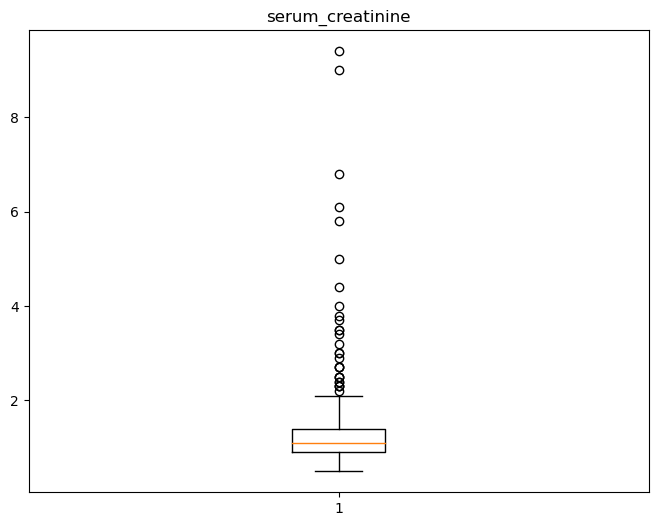

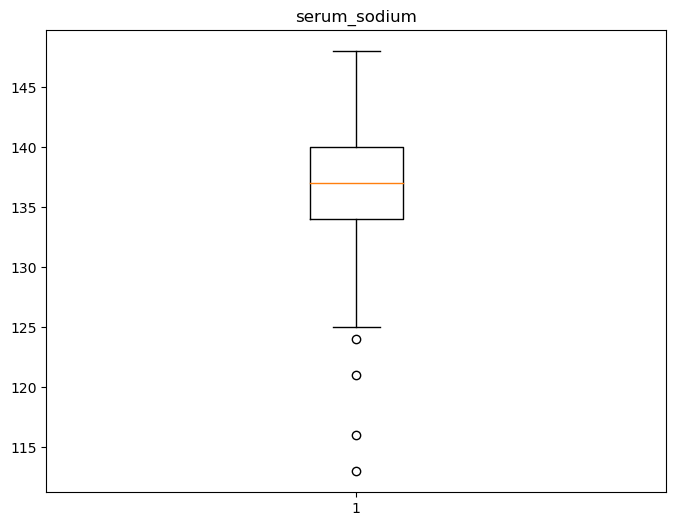

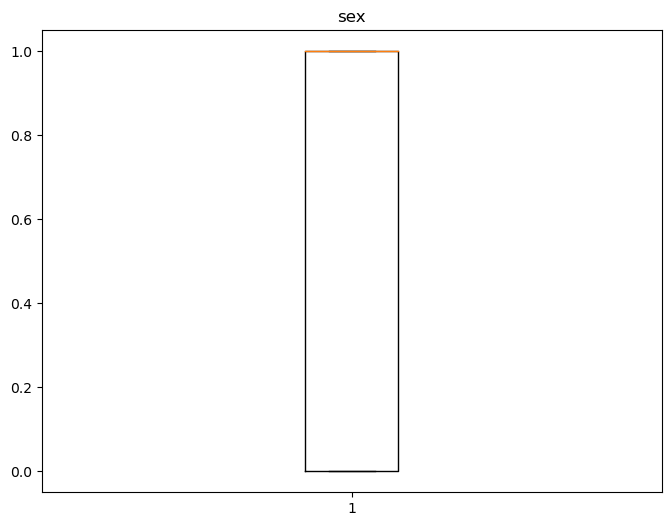

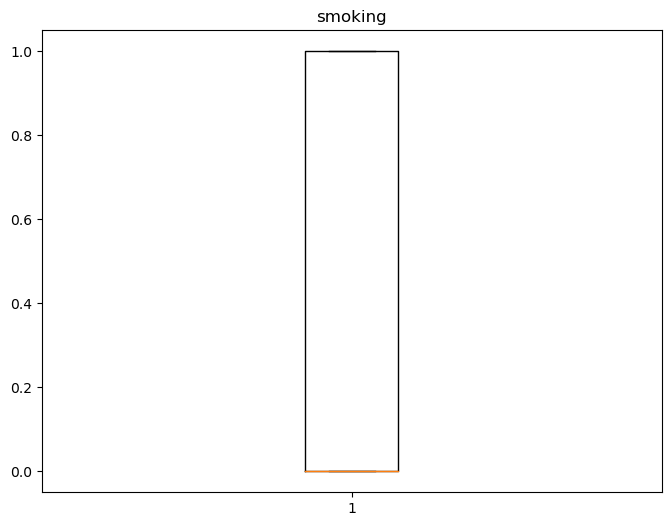

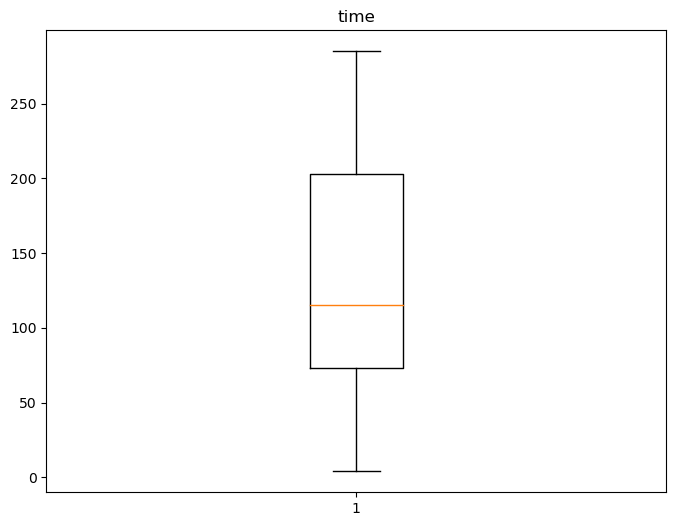

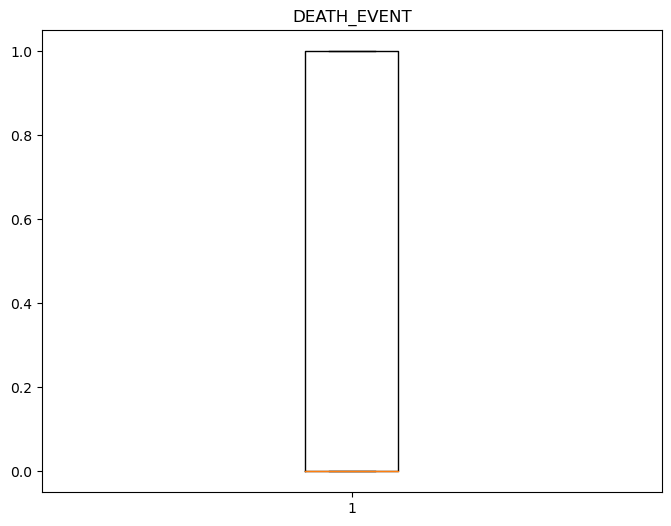

In [11]:
for col in df.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f'{col}')
    plt.show()  # in this loop all coulmns are plotted in boxplot .... and easy to find outliers 

In [12]:
def remove_outliers(df):
    for col in df.select_dtypes(include='number').columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers=(df[col] < lower_bound ) | (df[col] > upper_bound)
        df=df[~outliers]
    return df
df = remove_outliers(df)   #removing outliers for better visualisation 

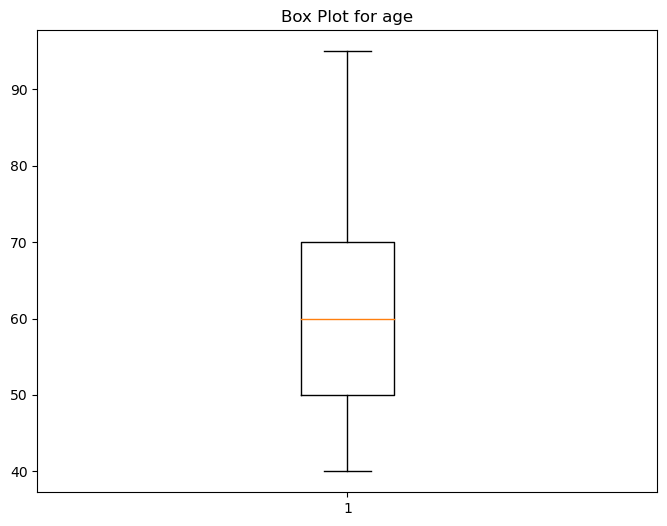

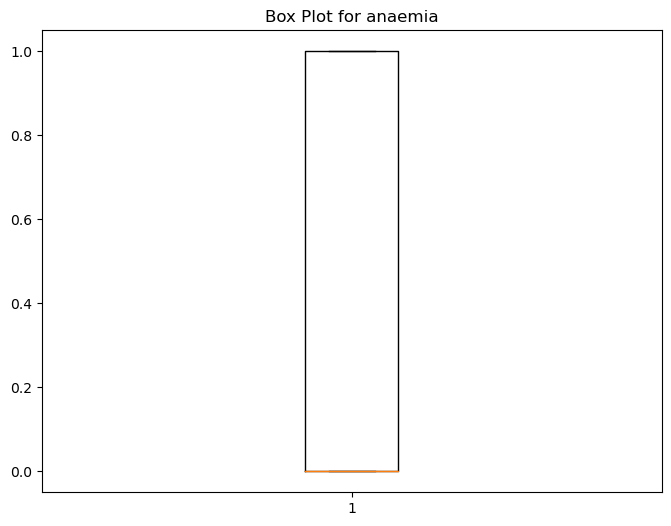

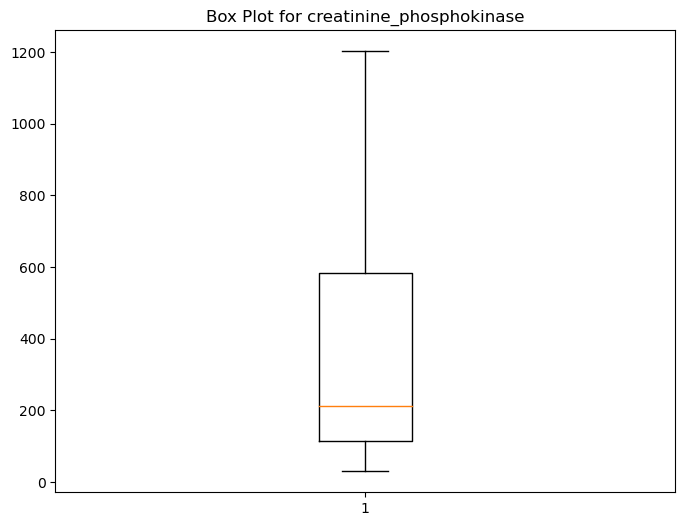

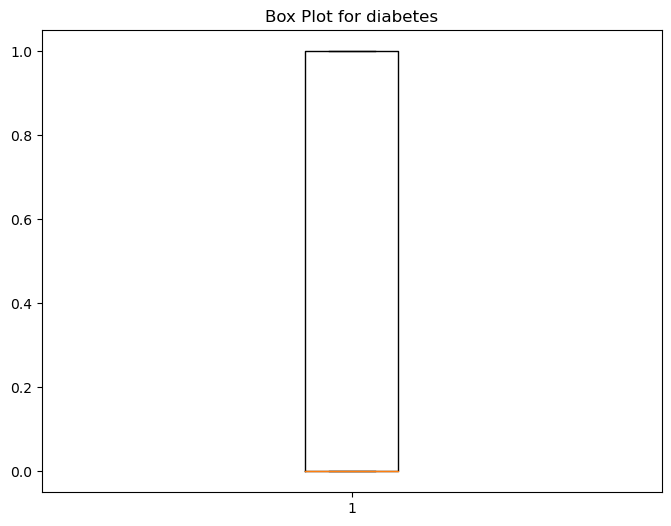

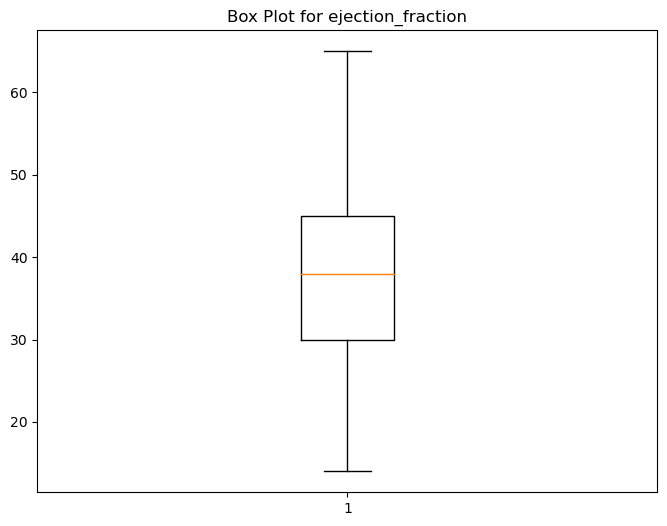

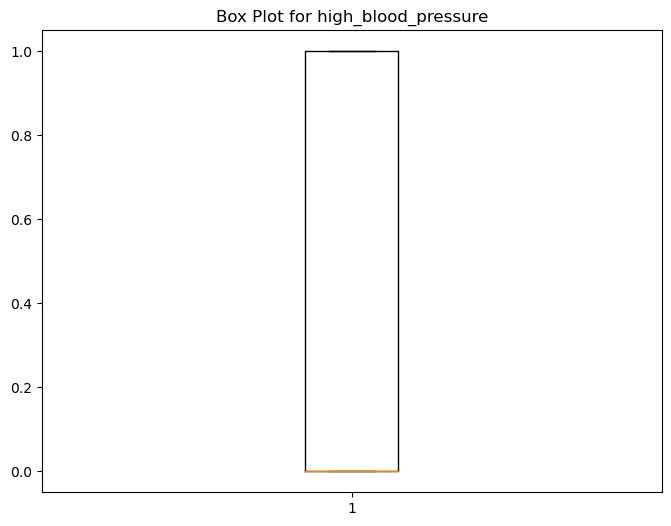

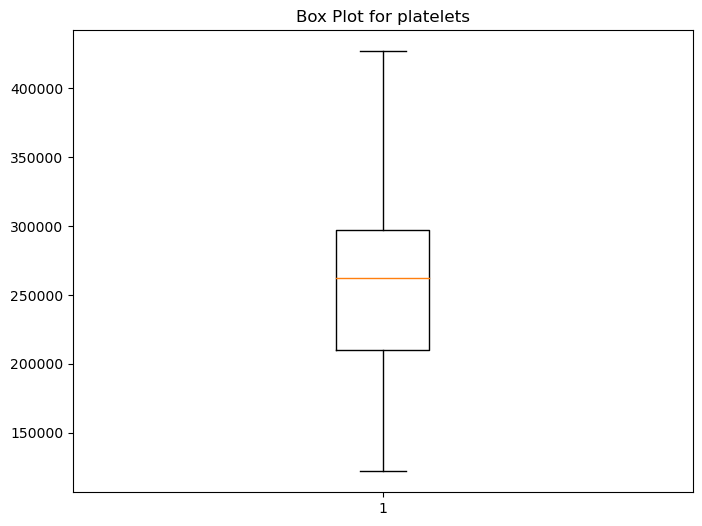

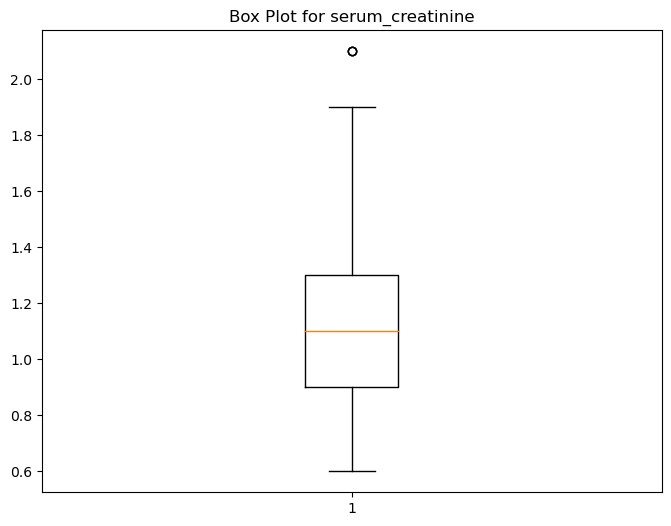

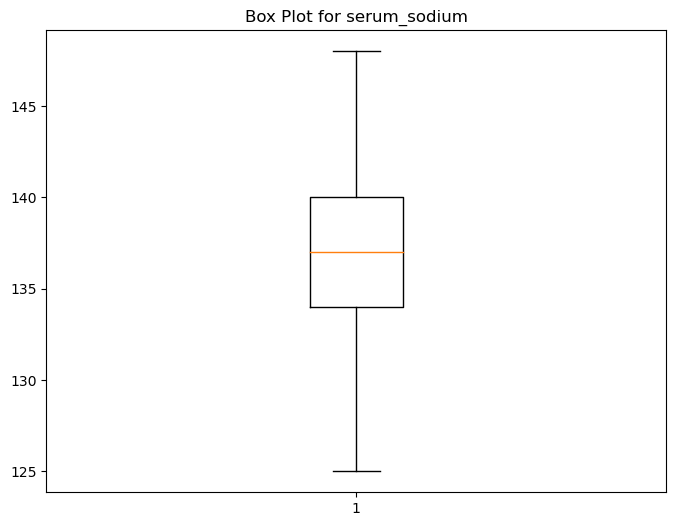

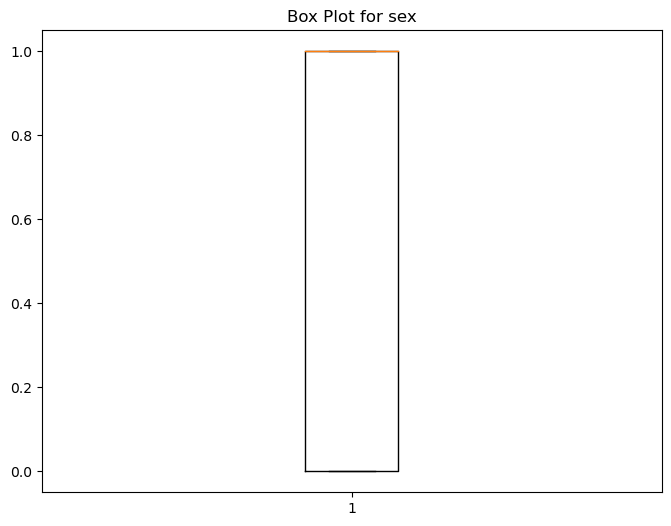

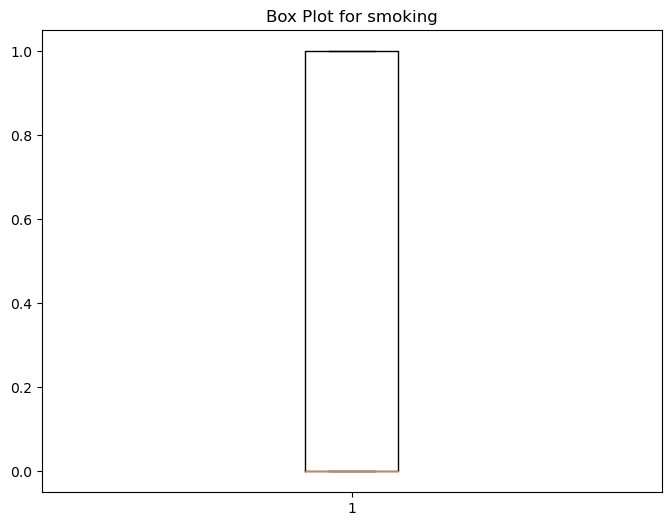

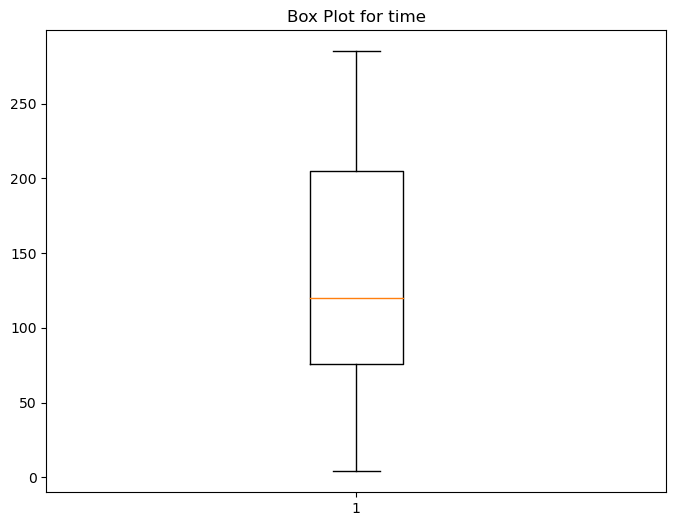

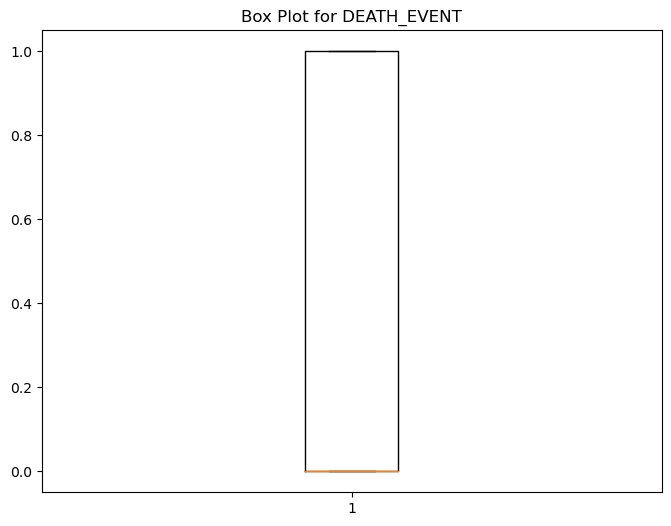

In [13]:
for col in df.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()   # now outliers are removed

Text(0.5, 1.0, 'Distribution of age')

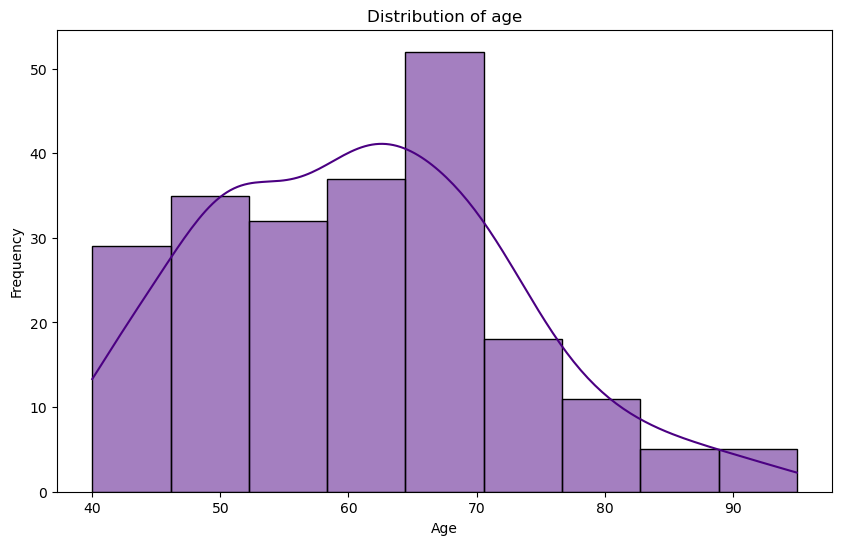

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='indigo')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age')  #by this visual representation we can see people who's age between 65-70 are affected most 

Text(0.5, 1.0, 'Smoking by age')

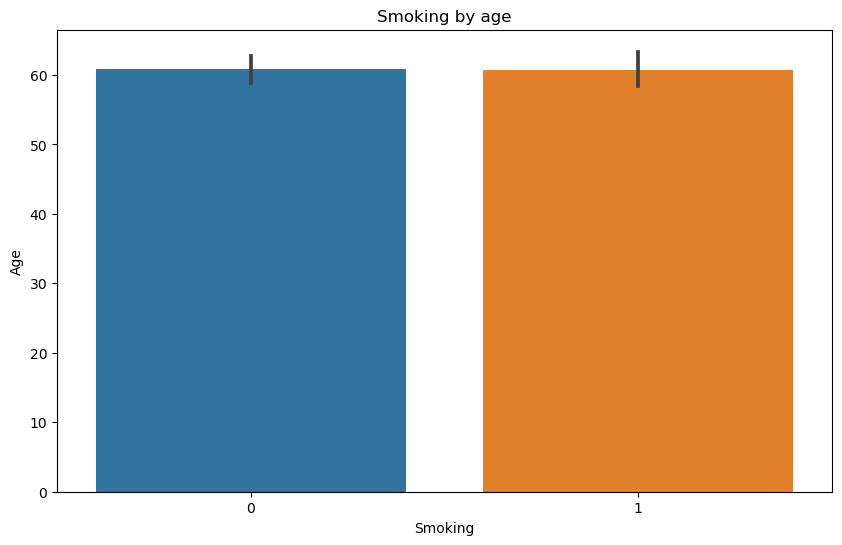

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['smoking'], y=df['age'])
plt.xlabel('Smoking')
plt.ylabel('Age')
plt.title('Smoking by age')

<Axes: >

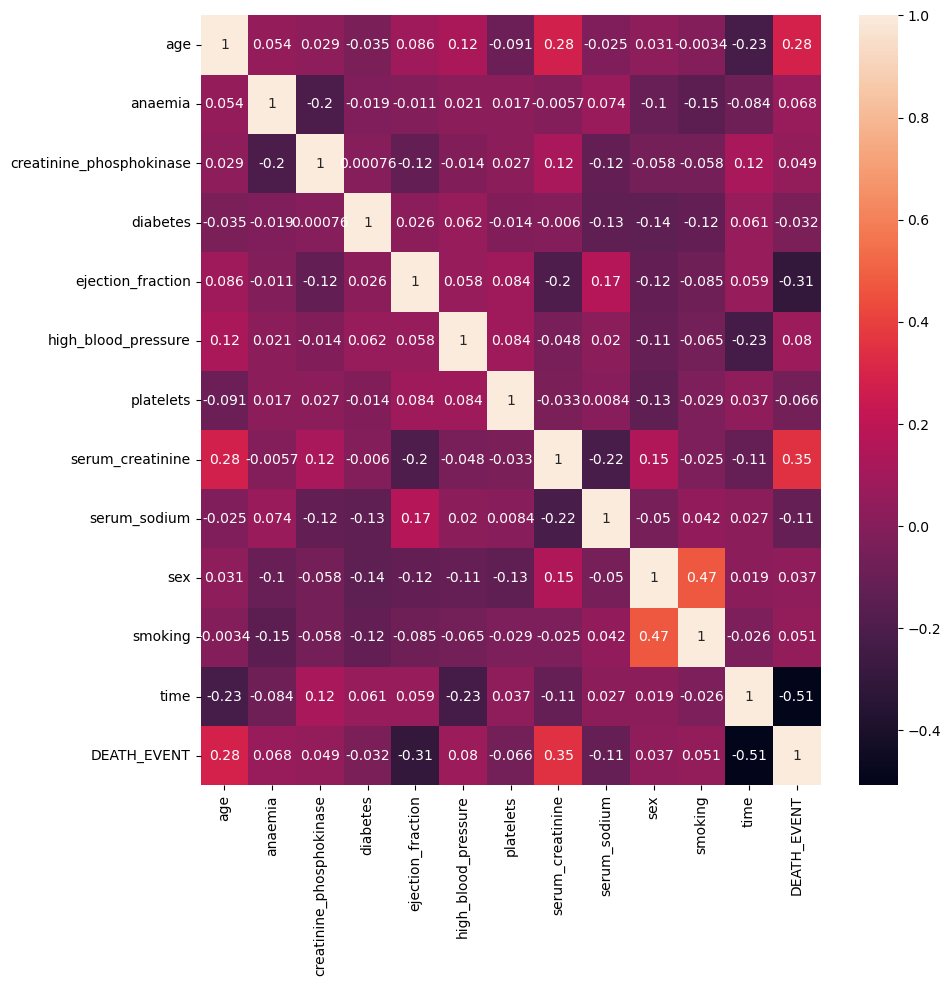

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
features=df.iloc[:,:-1]
target=df.iloc[:,-1]  # slippting data info features and target 

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(features,target,test_size=0.3,random_state=1)

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=0, max_depth = 3, max_features=5, min_samples_split = 3)
random_forest.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=5,
                       min_samples_split=3, random_state=0)

In [30]:
model=DecisionTreeClassifier(criterion="gini")
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
  
print(f" Accuracy: {ac}\n {cm}\n {cr}")  # 84% data accuracy  ..

 Accuracy: 0.8382352941176471
 [[43  5]
 [ 6 14]]
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        48
           1       0.74      0.70      0.72        20

    accuracy                           0.84        68
   macro avg       0.81      0.80      0.80        68
weighted avg       0.84      0.84      0.84        68



In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ypred=ada.predict(xtest)
print(classification_report(ytest,ypred))  # by using adaboostclassifer iits  give more accuracy .

              precision    recall  f1-score   support

           0       0.91      0.90      0.91        48
           1       0.76      0.80      0.78        20

    accuracy                           0.87        68
   macro avg       0.84      0.85      0.84        68
weighted avg       0.87      0.87      0.87        68



              precision    recall  f1-score   support

           0       0.88      0.92      0.90        48
           1       0.78      0.70      0.74        20

    accuracy                           0.85        68
   macro avg       0.83      0.81      0.82        68
weighted avg       0.85      0.85      0.85        68

